## EDA Project : 

In [124]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import sweetviz as sz

### Read the CSV File

In [125]:
df = pd.read_csv("telco-customer-churn.csv")

In [126]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [127]:
df.info() #Information on all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Column Details :

In [128]:
df.columns #column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [129]:
corr = df.corr()
corr  #correlation on all numeric data

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [130]:
df.nunique(axis=0) #returns the number of unique values for each attribute

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Changing categorical data into numeric

In [131]:
df['customerID'] = pd.factorize(df.customerID)[0]
df['gender'] = pd.factorize(df.gender)[0]
df['Partner'] = pd.factorize(df.Partner)[0]
df['Dependents'] = pd.factorize(df.Dependents)[0]
df['PhoneService'] = pd.factorize(df.PhoneService)[0]
df['MultipleLines'] = pd.factorize(df.MultipleLines)[0]
df['InternetService'] = pd.factorize(df.InternetService)[0]
df['OnlineSecurity'] = pd.factorize(df.OnlineSecurity)[0]
df['OnlineBackup'] = pd.factorize(df.OnlineBackup)[0]
df['DeviceProtection'] = pd.factorize(df.DeviceProtection)[0]
df['TechSupport'] = pd.factorize(df.TechSupport)[0]
df['StreamingTV'] = pd.factorize(df.StreamingTV)[0]
df['StreamingMovies'] = pd.factorize(df.StreamingMovies)[0]
df['Contract'] = pd.factorize(df.Contract)[0]
df['PaperlessBilling'] = pd.factorize(df.PaperlessBilling)[0]
df['PaymentMethod'] = pd.factorize(df.PaymentMethod)[0]
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64')
df['Churn'] = pd.factorize(df.Churn)[0]

### Removing Outliers:

In [132]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.516967,0.299588,32.371149,0.903166,1.325004,0.872923,0.720006,...,0.777226,0.723555,0.817691,0.821241,0.690473,0.407781,1.315633,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.737796,0.796885,...,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000
50%,3521.000000,1.000000,0.000000,1.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [133]:
#df = df.drop(columns=(['SeniorCitizen','gender','PaperlessBilling','PaymentMethod']))
df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,29.85,0
1,1,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1889.50,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,108.15,1
3,3,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,1840.75,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0,0,1,0,12,1,2,1,1,...,0,0,0,0,0,0,0,78.95,927.35,1
96,96,1,0,0,1,71,1,2,0,1,...,0,1,0,0,1,0,3,66.85,4748.70,0
97,97,1,0,1,0,5,1,1,2,2,...,2,2,2,2,0,1,1,21.05,113.85,1
98,98,1,0,1,0,52,1,1,2,2,...,2,2,2,2,2,1,2,21.00,1107.20,0


In [134]:
df.isnull().values.any() # to find all the null, NAN or empty values over the entire DataFrame
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [135]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean()) #substitute null values with mean

df.isnull().values.any() # to find all the null, NAN or empty values over the entire DataFrame to re-check 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [136]:
corr = df.corr() # correlation on all the categorical as well as numeric data 
corr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,-0.008192,0.008170,0.000189,-0.005171,0.007150,-0.027049,-0.023091,-0.007824,-0.001836,...,-0.004869,0.003892,-0.001688,-0.011087,0.003361,-0.002741,-0.013593,-0.012606,0.001818,0.010286
gender,-0.008192,1.000000,-0.001874,0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.000863,-0.003429,...,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.014569,0.000048,-0.008612
SeniorCitizen,0.008170,-0.001874,1.000000,-0.016479,-0.211185,0.016567,0.008576,0.113791,-0.032310,-0.210897,...,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.220173,0.102395,0.150889
Partner,0.000189,0.001808,-0.016479,1.000000,-0.452676,-0.379697,-0.017706,-0.117307,-0.000891,-0.081850,...,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.096848,-0.318812,0.150448
Dependents,-0.005171,0.010517,-0.211185,-0.452676,1.000000,0.159712,-0.001762,-0.019657,0.044590,0.190523,...,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.113890,0.064535,-0.164221
tenure,0.007150,0.005106,0.016567,-0.379697,0.159712,1.000000,0.008448,0.258958,-0.030359,0.145298,...,0.178649,0.144459,0.136145,0.140781,0.671607,-0.006152,0.340305,0.247900,0.824757,-0.352229
PhoneService,-0.027049,-0.006488,0.008576,-0.017706,-0.001762,0.008448,1.000000,0.675070,0.387436,0.125353,...,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,0.247398,0.112851,0.011942
MultipleLines,-0.023091,-0.009451,0.113791,-0.117307,-0.019657,0.258958,0.675070,1.000000,0.186826,-0.066844,...,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.490700,0.412079,0.036310
InternetService,-0.007824,-0.000863,-0.032310,-0.000891,0.044590,-0.030359,0.387436,0.186826,1.000000,0.607788,...,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.001836,-0.003429,-0.210897,-0.081850,0.190523,0.145298,0.125353,-0.066844,0.607788,1.000000,...,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.621227,-0.153051,-0.332819


### Splitting data ::

# Splitting the data into : Training & Test ::

In [142]:
features = df.iloc[:,2:-1] 
Y = df.iloc[:,-1:] # splitting last column Churn
features  # splitting all but the last column as features

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85
1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50
2,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15
3,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75
4,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.50
7039,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.90
7040,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45
7041,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.60


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.25, random_state=42)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5282, 18)
(5282, 1)
(1761, 18)
(1761, 1)


<AxesSubplot:>

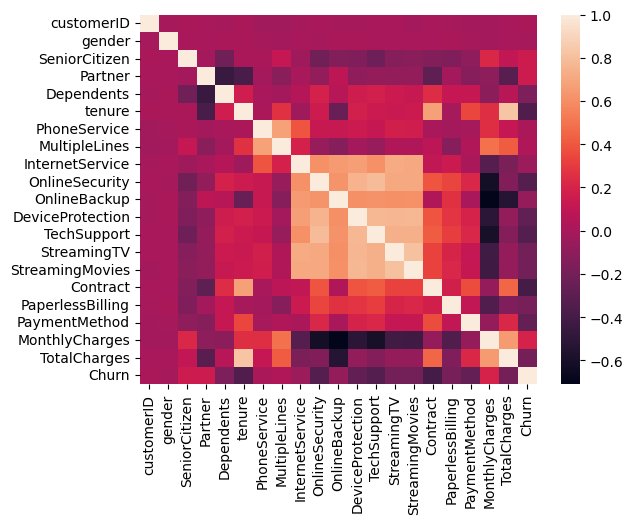

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [18]:
training = df[100:]
testing = df[:100]
df1 = sz.compare([training, 'Training'], [testing, 'Testing'],'Churn')
#df1.show_notebook()
'''df1.show_html('Compared_training_test.html')'''  

                                             |      | [  0%]   00:00 -> (? left)

"df1.show_html('Compared_training_test.html')"

In [19]:
'''my_report = sz.analyze(df)
#my_report.show_notebook()'''

'my_report = sz.analyze(df)\n#my_report.show_notebook()'

In [20]:
'''my_report.show_html('Analysis.html','Churn') '''

"my_report.show_html('Analysis.html','Churn') "

In [21]:
'''#df.profile_report('profile.html')
profile = ProfileReport(df, title="Pandas Profiling Report")
# Pandas profiling provides the correlation deatils for each attribute 
profile.to_file("Dataframe.html")'''

'#df.profile_report(\'profile.html\')\nprofile = ProfileReport(df, title="Pandas Profiling Report")\n# Pandas profiling provides the correlation deatils for each attribute \nprofile.to_file("Dataframe.html")'

# Project 2 :

## **INTRODUCTION TO ASSIGNMENT 2 :**

* For assignment 2 we have started the model creation after training and test data has been spit.
* For each model, the metrics considered for analysis are - Accuracy, Precision, Recall and F1-Score
* The main metric for performance for any model is "Recall".
* After each Machine Learning model the SMOTE techinque for the same model has been applied and its performance metric is considered.
* Then a table with the comparision is given
* Hyperparameter tuning for both Random Forest and XGBoost is performed. Both GridSearch & RandomizedSearch Techinque is used in order to better understand which would give a better recall score. 
* the graph for the same is also provided.

/var/folders/ln/pbcxn49166jfyk2247nthr4c0000gn/T/ipykernel_35995/833125074.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


[0.0266509  0.03244137 0.02561602 0.15689073 0.00657082 0.02983528
 0.03210557 0.05457091 0.03139185 0.03316592 0.04456225 0.02728492
 0.02776596 0.07276531 0.03007646 0.06741226 0.14072715 0.16016631]


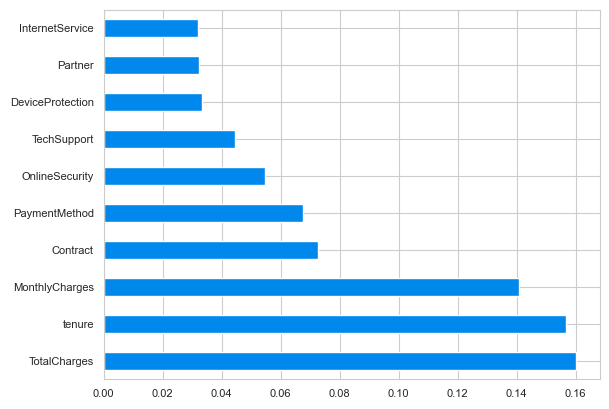

In [144]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [146]:
X_train.drop(['InternetService','Partner','DeviceProtection'],axis=1)

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6607,0,1,1,0,0,0,1,0,0,0,0,0,0,25.30,25.30
2598,0,0,7,1,1,0,1,0,0,0,0,0,0,75.15,525.00
2345,0,1,4,1,1,2,2,2,2,2,0,0,2,20.05,85.50
4093,0,0,29,1,2,0,1,0,0,0,0,0,3,76.00,2215.25
693,0,0,3,1,2,0,1,0,0,0,0,0,3,75.10,270.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,1,1,1,0,1,1,0,0,0,95.00,95.00
5191,0,1,23,1,2,1,0,1,1,1,2,0,3,91.10,2198.30
5226,0,1,12,1,1,2,2,2,2,2,0,0,0,21.15,306.05
5390,1,0,12,1,2,0,1,0,1,1,0,0,0,99.45,1200.15


### Naive Bayes Classifier:

In [147]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
model = GaussianNB()

In [148]:
model.fit(X_train,y_train.values.ravel())
# predict the target on the train dataset
nv_predict = model.predict(X_test)

In [149]:
bayes_recall = recall_score(y_test,nv_predict)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, nv_predict)))
print('Precison : ',precision_score(y_test ,nv_predict))
print("f1 score: ", f1_score(y_test,nv_predict))
print('\033[1m'"recall score: ", bayes_recall)

Model accuracy score: 0.7155
Precison :  0.4866504854368932
f1 score:  0.6155026861089793
recall score:  0.837160751565762


### Naive Bayes Classifier with SMOTE :

In [150]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_Smote, y_train_Smote = smote.fit_resample(X_train, y_train)
model.fit(X_train_Smote,y_train_Smote)
nv_predict_Smote = model.predict(X_test)
bayes_recall_SMOTE = recall_score(y_test,nv_predict_Smote)

print('Model accuracy score with SMOTE: {0:0.4f}'. format(accuracy_score(y_test, nv_predict_Smote)))
print('Precison with SMOTE: ',precision_score(y_test ,nv_predict_Smote))
print("f1 score with SMOTE : ", f1_score(y_test,nv_predict_Smote))
print('\033[1m'"recall score with SMOTE: ", bayes_recall_SMOTE)

Model accuracy score with SMOTE: 0.7172
Precison with SMOTE:  0.4880503144654088
f1 score with SMOTE :  0.6091051805337518
recall score with SMOTE:  0.8100208768267223


/Users/anusha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Recall : is the fraction of relevant instances that were retrieved. 
* We see from the above recalls (**Naive Bayes with and without SMOTE**) that the value obtained for the **SMOTE dataset is lower** than that of the original value.
* F-measure is a measure of a test's accuracy.
* Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.

### How SMOTE affected the predictions column :

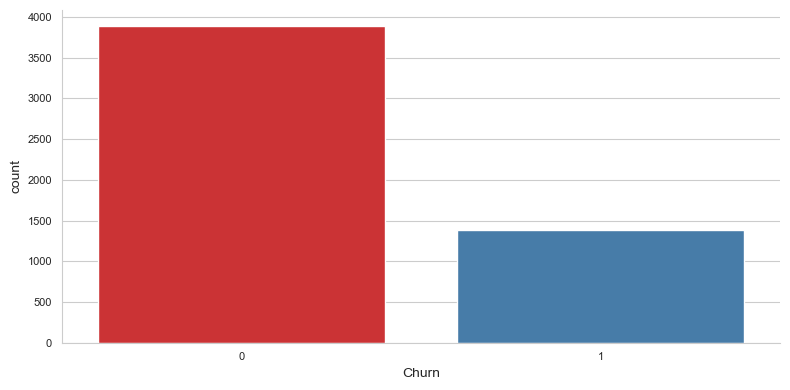

In [73]:
sns.set_style('whitegrid')
graph = sns.catplot(kind='count', data=y_train,
                x='Churn', palette='Set1', height=4, aspect=2)

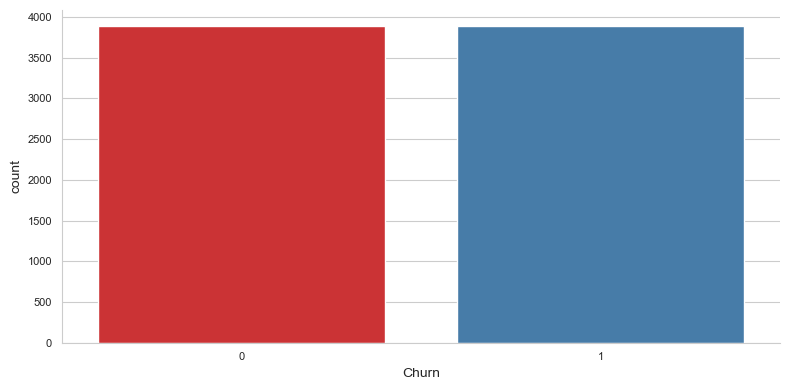

In [74]:
graph_with_Smote = sns.catplot(kind='count', data=y_train_Smote,
                x='Churn', palette='Set1', height=4, aspect=2)

By applying SMOTE on the dataset we can see that the number of sample for the churn target variable have been balanced.

### Visualize Confusion Matrix With Seaborn Heatmap:

<AxesSubplot:>

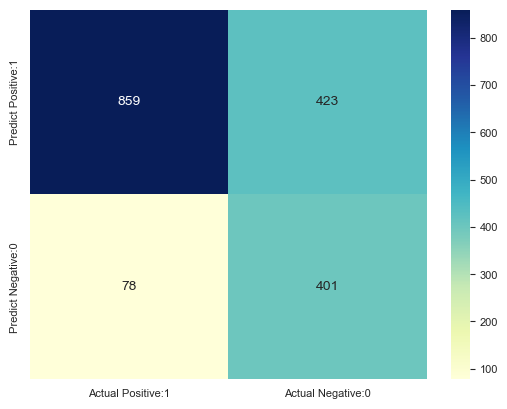

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, nv_predict)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Confusion Matrix with SMOTE :

<AxesSubplot:>

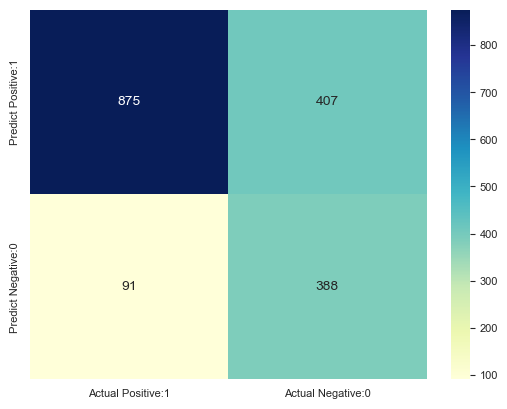

In [32]:
cm_SMOTE = confusion_matrix(y_test, nv_predict_Smote)

cm_matrix_Smote = pd.DataFrame(data=cm_SMOTE, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_Smote, annot=True, fmt='d', cmap='YlGnBu')

* The True Positive have increased in value
* False Positive value have reduced in the dataset
* True Negative have reduced 
* The False Negative value have  also increased

### LOGISTIC REGRESSION:

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train.values.ravel())

lr_predict = logreg.predict(X_test)

#finding different scores
acc_lr = accuracy_score(y_test ,lr_predict)
pre_lr = precision_score(y_test ,lr_predict)
rec_lr = recall_score(y_test ,lr_predict)
f1_lr = f1_score(y_test ,lr_predict)
print('LOGISTIC REGRESSION ACCURACY : ',acc_lr)
print('LOGISTIC REGRESSION PRECISON : ',pre_lr)
print('LOGISTIC REGRESSION F1_SCORE : ',f1_lr)
print('\033[1m''LOGISTIC REGRESSION RECALL : ',rec_lr)

LOGISTIC REGRESSION ACCURACY :  0.8097671777399205
LOGISTIC REGRESSION PRECISON :  0.6764705882352942
LOGISTIC REGRESSION F1_SCORE :  0.6223224351747463
LOGISTIC REGRESSION RECALL :  0.5762004175365344


### LOGISTIC REGRESSION with SMOTE :

In [34]:
X_train_Smote, y_train_Smote = smote.fit_resample(X_train, y_train)

#fitting the model for SMOTE
logreg.fit(X_train_Smote,y_train_Smote.values.ravel())

lr_predict_Smote = logreg.predict(X_test)

acc_lr_SMOTE = accuracy_score(y_test ,lr_predict_Smote)
pre_lr_SMOTE = precision_score(y_test ,lr_predict_Smote)
rec_lr_SMOTE = recall_score(y_test ,lr_predict_Smote)
f1_lr_SMOTE = f1_score(y_test ,lr_predict_Smote)

print('LOGISTIC REGRESSION ACCURACY with SMOTE : ',acc_lr_SMOTE)
print('LOGISTIC REGRESSION PRECISON with SMOTE : ',pre_lr_SMOTE)
print('LOGISTIC REGRESSION F1_SCORE with SMOTE : ',f1_lr_SMOTE)
print('\033[1m''LOGISTIC REGRESSION RECALL with SMOTE : ',rec_lr_SMOTE)

LOGISTIC REGRESSION ACCURACY with SMOTE :  0.7643384440658717
LOGISTIC REGRESSION PRECISON with SMOTE :  0.5483383685800605
LOGISTIC REGRESSION F1_SCORE with SMOTE :  0.6362839614373357
LOGISTIC REGRESSION RECALL with SMOTE :  0.7578288100208769


### Random Forest Classifier :

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train , y_train.values.ravel())

Rf_predict = rf.predict(X_test)

#finding different scores
acc_rf = accuracy_score(y_test ,Rf_predict)
pre_rf = precision_score(y_test ,Rf_predict)
rec_rf = recall_score(y_test ,Rf_predict)
f1_rf = f1_score(y_test ,Rf_predict)
print('RANDOM FOREST  CLASSIFIER ACCURACY : ',acc_rf)
print('RANDOM FOREST  CLASSIFIER PRECISON : ',pre_rf)
print('RANDOM FOREST  CLASSIFIER F1_SCORE : ',f1_rf)
print('\033[1m''RANDOM FOREST CLASSIFIER RECALL : ',rec_rf)

RANDOM FOREST  CLASSIFIER ACCURACY :  0.7950028392958546
RANDOM FOREST  CLASSIFIER PRECISON :  0.6735294117647059
RANDOM FOREST  CLASSIFIER F1_SCORE :  0.5592185592185593
RANDOM FOREST CLASSIFIER RECALL :  0.4780793319415449


### Random Forest Classifier with SMOTE:

In [153]:
#fitting the model for SMOTE
rf.fit(X_train_Smote,y_train_Smote.values.ravel())

rf_predict_Smote = rf.predict(X_test)

acc_rf_SMOTE = accuracy_score(y_test ,rf_predict_Smote)
pre_rf_SMOTE = precision_score(y_test ,rf_predict_Smote)
rec_rf_SMOTE = recall_score(y_test ,rf_predict_Smote)
f1_rf_SMOTE = f1_score(y_test ,rf_predict_Smote) 

print('RANDOM FOREST  CLASSIFIER ACCURACY with SMOTE : ',acc_rf_SMOTE)
print('RANDOM FOREST  CLASSIFIER PRECISON with SMOTE: ',pre_rf_SMOTE)
print('RANDOM FOREST  CLASSIFIER F1_SCORE with SMOTE : ',f1_rf_SMOTE)
print('\033[1m''RANDOM FOREST CLASSIFIER RECALL with SMOTE : ',rec_rf_SMOTE)

RANDOM FOREST  CLASSIFIER ACCURACY with SMOTE :  0.7791027825099376
RANDOM FOREST  CLASSIFIER PRECISON with SMOTE:  0.5941422594142259
RANDOM FOREST  CLASSIFIER F1_SCORE with SMOTE :  0.593521421107628
RANDOM FOREST CLASSIFIER RECALL with SMOTE :  0.592901878914405


### XGB Classifier :

In [154]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
xgb.fit(X_train, y_train, verbose=False)

xgb_predict = xgb.predict(X_test)

#finding different scores
acc_xgb = accuracy_score(y_test ,xgb_predict)
pre_xgb = precision_score(y_test ,xgb_predict)
rec_xgb = recall_score(y_test ,xgb_predict)
f1_xgb = f1_score(y_test ,xgb_predict)
print('XGBoost  CLASSIFIER ACCURACY : ',acc_xgb)
print('XGBoost  CLASSIFIER PRECISON : ',pre_xgb)
print('XGBoost  CLASSIFIER F1_SCORE : ',f1_xgb)
print('\033[1m''XGBoost CLASSIFIER RECALL : ',rec_xgb)

XGBoost  CLASSIFIER ACCURACY :  0.7847813742191937
XGBoost  CLASSIFIER PRECISON :  0.6344086021505376
XGBoost  CLASSIFIER F1_SCORE :  0.554641598119859
XGBoost CLASSIFIER RECALL :  0.49269311064718163


### With SMOTE for XGBoost :

In [155]:
xgb.fit(X_train_Smote,y_train_Smote)

xgb_predict_Smote = xgb.predict(X_test)

acc_xgb_SMOTE = accuracy_score(y_test ,xgb_predict_Smote)
pre_xgb_SMOTE = precision_score(y_test ,xgb_predict_Smote)
rec_xgb_SMOTE = recall_score(y_test ,xgb_predict_Smote)
f1_xgb_SMOTE = f1_score(y_test ,xgb_predict_Smote) 

print('XGBoost ACCURACY with SMOTE : ',acc_xgb_SMOTE)
print('XGBoost CLASSIFIER PRECISON : ',pre_xgb_SMOTE)
print('XGBoost CLASSIFIER F1_SCORE with SMOTE : ',f1_xgb_SMOTE)
print('\033[1m''XGBoost CLASSIFIER RECALL with SMOTE : ',rec_xgb_SMOTE)

XGBoost ACCURACY with SMOTE :  0.7819420783645656
XGBoost CLASSIFIER PRECISON :  0.5936883629191322
XGBoost CLASSIFIER F1_SCORE with SMOTE :  0.6105476673427992
XGBoost CLASSIFIER RECALL with SMOTE :  0.6283924843423799


## Recall for all the Standard Models vs  SMOTE Models:

In [156]:
recall_model_values = {'Models': ['Naive Bayes', 'LOGISTIC REGRESSION', 'RANDOM FOREST', 'XGBoost'],
        'Recall': [bayes_recall, rec_lr, rec_rf, rec_xgb]}
df = pd.DataFrame(recall_model_values)
df

,Models,Recall
0,Naive Bayes,0.837161
1,LOGISTIC REGRESSION,0.576200
2,RANDOM FOREST,0.478079
3,XGBoost,0.492693


In [157]:
recall_with_SMOTE = {'Models': ['Naive Bayes', 'LOGISTIC REGRESSION', 'RANDOM FOREST', 'XGBoost'],
        'Recall': [bayes_recall_SMOTE, rec_lr_SMOTE, rec_rf_SMOTE, rec_xgb_SMOTE]}
df2 = pd.DataFrame(recall_with_SMOTE)
df2

,Models,Recall
0,Naive Bayes,0.810021
1,LOGISTIC REGRESSION,0.757829
2,RANDOM FOREST,0.592902
3,XGBoost,0.628392


As we can see from the above table, the Naive Bayes recall value has dropped post SMOTE technique but for the other 3 models - Logistic Regression, Random Forest and XGBoost the recall has increased.

### Hyperparameter tuning

In [112]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [160]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   random_state=42)

In [161]:
rf_random_predicted = rf_random.predict(X_test)

acc_rf_random = accuracy_score(y_test ,rf_random_predicted)
pre_rf_random = precision_score(y_test ,rf_random_predicted)
rec_rf_random = recall_score(y_test ,rf_random_predicted)
f1_rf_random = f1_score(y_test ,rf_random_predicted) 

print('RANDOM FOREST CLASSIFIER ACCURACY with hyperparameter tuning : ',acc_rf_random)
print('RANDOM FOREST CLASSIFIER PRECISION with hyperparameter tuning : ',pre_rf_random)
print('RANDOM FOREST CLASSIFIER F1_SCORE with hyperparameter tuning : ',f1_rf_random)
print('\033[1m''RANDOM FOREST CLASSIFIER RECALL with hyperparameter tuning : ',rec_rf_random)

RANDOM FOREST CLASSIFIER ACCURACY with hyperparameter tuning :  0.8012492901760363
RANDOM FOREST CLASSIFIER PRECISION with hyperparameter tuning :  0.6948640483383686
RANDOM FOREST CLASSIFIER F1_SCORE with hyperparameter tuning :  0.5679012345679013
RANDOM FOREST CLASSIFIER RECALL with hyperparameter tuning :  0.4801670146137787


In each iteration, the Random Hyperparameter Grid algorithm will choose a difference combination of the features.The benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [162]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


In [163]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [164]:
grid_accuracy = grid_search.predict(X_test)

acc_rf_grid = accuracy_score(y_test ,grid_accuracy)
pre_rf_grid = precision_score(y_test ,grid_accuracy)
rec_rf_grid = recall_score(y_test ,grid_accuracy)
f1_rf_grid = f1_score(y_test ,grid_accuracy) 

print('RANDOM FOREST CLASSIFIER ACCURACY with GridSearch hyperparameter tuning : ',acc_rf_grid)
print('RANDOM FOREST CLASSIFIER PRECISION with GridSearch hyperparameter tuning : ',pre_rf_grid)
print('RANDOM FOREST CLASSIFIER F1_SCORE with GridSearch hyperparameter tuning : ',f1_rf_grid)
print('\033[1m''RANDOM FOREST CLASSIFIER RECALL with GridSearch hyperparameter tuning : ',rec_rf_grid)

RANDOM FOREST CLASSIFIER ACCURACY with GridSearch hyperparameter tuning :  0.7932992617830777
RANDOM FOREST CLASSIFIER PRECISION with GridSearch hyperparameter tuning :  0.6802507836990596
RANDOM FOREST CLASSIFIER F1_SCORE with GridSearch hyperparameter tuning :  0.543859649122807
RANDOM FOREST CLASSIFIER RECALL with GridSearch hyperparameter tuning :  0.453027139874739


The difference between both the approaches is in GridSearch we define the combinations and do training of the model whereas in RandomizedSearchCV the model selects the combinations randomly. 

### Precision Recall graph for Random Forest

Text(0.5, 1.0, 'Precision-Recall curve')

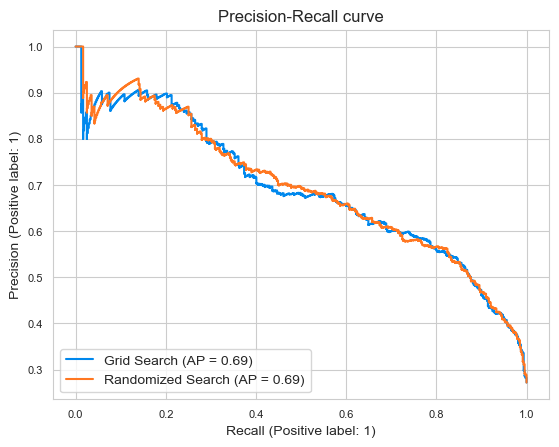

In [165]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(grid_search, X_test, y_test, ax = plt.gca(),name = "Grid Search")

PrecisionRecallDisplay.from_estimator(rf_random, X_test, y_test, ax = plt.gca(),name = "Randomized Search")

plt.title('Precision-Recall curve')

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

### Hyperparameter tuning for XGB:

In [166]:
# Create the random grid
tuned_parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 8]
        }

xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = tuned_parameters, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300...
                                           max_delta_step=0, max_depth=6,
                                           max_leaves=0, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5, 10],
                                        'max_depth': [3, 5, 8],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42)

In [167]:
xgb_random_predicted = xgb_random.predict(X_test)
acc_xgb_random = accuracy_score(y_test ,xgb_random_predicted)
rec_xgb_random = recall_score(y_test ,xgb_random_predicted)
f1_xgb_random = f1_score(y_test ,xgb_random_predicted) 

print('XGB CLASSIFIER ACCURACY with hyperparameter tuning : ',acc_xgb_random)
print('XGB CLASSIFIER F1_SCORE with hyperparameter tuning : ',f1_xgb_random)
print('\033[1m''XGB CLASSIFIER RECALL with hyperparameter tuning : ',rec_xgb_random)

XGB CLASSIFIER ACCURACY with hyperparameter tuning :  0.8029528676888131
XGB CLASSIFIER F1_SCORE with hyperparameter tuning :  0.5854241338112306
XGB CLASSIFIER RECALL with hyperparameter tuning :  0.511482254697286


In [168]:
# Create the parameter grid based on the results of random search 
grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = tuned_parameters, 
                          cv = 3, n_jobs = -1)

grid_search_xgb.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5, 10],
                         'max_depth': [3, 5, 8], 'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]})

In [169]:
grid_accuracy = grid_search_xgb.predict(X_test)

acc_xgb_grid = accuracy_score(y_test ,grid_accuracy)
rec_xgb_grid = recall_score(y_test ,grid_accuracy)
f1_xgb_grid = f1_score(y_test ,grid_accuracy) 

print('XGB CLASSIFIER ACCURACY with GridSearch hyperparameter tuning : ',acc_xgb_grid)
print('XGB CLASSIFIER F1_SCORE with GridSearch hyperparameter tuning : ',f1_xgb_grid)
print('\033[1m''XGB CLASSIFIER RECALL with GridSearch hyperparameter tuning : ',rec_xgb_grid)

XGB CLASSIFIER ACCURACY with GridSearch hyperparameter tuning :  0.8052243043725156
XGB CLASSIFIER F1_SCORE with GridSearch hyperparameter tuning :  0.5852478839177752
XGB CLASSIFIER RECALL with GridSearch hyperparameter tuning :  0.5052192066805845


### Precision Recall Graph for XGB:

Text(0.5, 1.0, 'Precision-Recall curve')

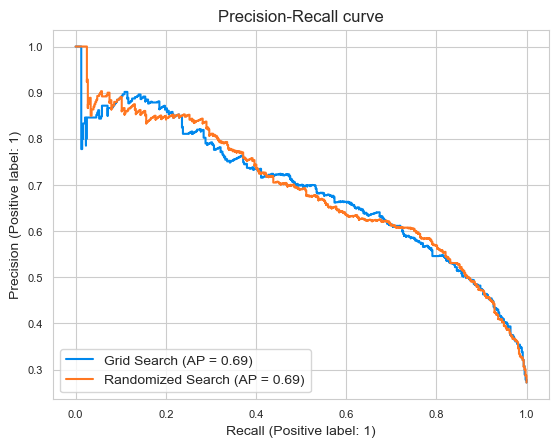

In [170]:
PrecisionRecallDisplay.from_estimator(grid_search_xgb, X_test, y_test, ax = plt.gca(),name = "Grid Search")

PrecisionRecallDisplay.from_estimator(xgb_random, X_test, y_test, ax = plt.gca(),name = "Randomized Search")

plt.title('Precision-Recall curve')

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

In [171]:
recall_model_values = {'Models': ['RANDOM FOREST', 'XGBoost'],
        'Recall for Std Models': [ rec_rf, rec_xgb],
        'Recall with Random Search': [rec_rf_random, rec_xgb_random],
        'Recall with Grid Search': [rec_rf_grid, rec_xgb_grid]}
df = pd.DataFrame(recall_model_values)
df

,Models,Recall for Std Models,Recall with Random Search,Recall with Grid Search
0,RANDOM FOREST,0.478079,0.480167,0.453027
1,XGBoost,0.492693,0.511482,0.505219
